In [45]:
import pandas as pd

In [ ]:
sample = None
opf_data = pd.read_csv('/Users/baslad01/data_dump/openfoodfacts/product_data/en.openfoodfacts.org.products.csv', sep='\t', encoding='utf-8', on_bad_lines='skip', nrows=sample)
opf_data.head()

In [34]:
# find the columns that have 'sugar' in them
sugar_columns = [col for col in opf_data.columns if 'sugar' in col]
sugar_columns

['sugars_100g', 'added-sugars_100g']

In [35]:
# Filter the data where added sugar is not missing
opf_data_sugg_add = opf_data[opf_data['added-sugars_100g'].notna()]
opf_data_sugg_add

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
1124,0000110000402,http://world-en.openfoodfacts.org/product/0000...,macrofactor,1717888012,2024-06-08T23:06:52Z,1719294807,2024-06-25T05:53:27Z,roboto-app,1.719295e+09,2024-06-25T05:53:27Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,0000110003502,http://world-en.openfoodfacts.org/product/0000...,macrofactor,1719883515,2024-07-02T01:25:15Z,1719883558,2024-07-02T01:25:58Z,macrofactor,1.719884e+09,2024-07-02T01:25:58Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1127,0000110003601,http://world-en.openfoodfacts.org/product/0000...,macrofactor,1719266953,2024-06-24T22:09:13Z,1719266953,2024-06-24T22:09:13Z,macrofactor,1.719267e+09,2024-06-24T22:09:13Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210,00001427,http://world-en.openfoodfacts.org/product/0000...,roboto-app,1682726353,2023-04-28T23:59:13Z,1714188595,2024-04-27T03:29:55Z,macrofactor,1.714189e+09,2024-04-27T03:29:55Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1227,00001526,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1581985444,2020-02-18T00:24:04Z,1715348698,2024-05-10T13:44:58Z,macrofactor,1.715349e+09,2024-05-10T13:44:58Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99934,31000111311,http://world-en.openfoodfacts.org/product/0031...,macrofactor,1717027431,2024-05-30T00:03:51Z,1717027431,2024-05-30T00:03:51Z,macrofactor,1.717027e+09,2024-05-30T00:03:51Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99954,31000126100,http://world-en.openfoodfacts.org/product/0031...,kiliweb,1580345094,2020-01-30T00:44:54Z,1713914149,2024-04-23T23:15:49Z,macrofactor,1.713914e+09,2024-04-23T23:15:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99962,31000132477,http://world-en.openfoodfacts.org/product/0031...,kiliweb,1688063408,2023-06-29T18:30:08Z,1718780968,2024-06-19T07:09:28Z,macrofactor,1.718781e+09,2024-06-19T07:09:28Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99990,31000198763,http://world-en.openfoodfacts.org/product/0031...,macrofactor,1717527937,2024-06-04T19:05:37Z,1717527937,2024-06-04T19:05:37Z,macrofactor,1.717528e+09,2024-06-04T19:05:37Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


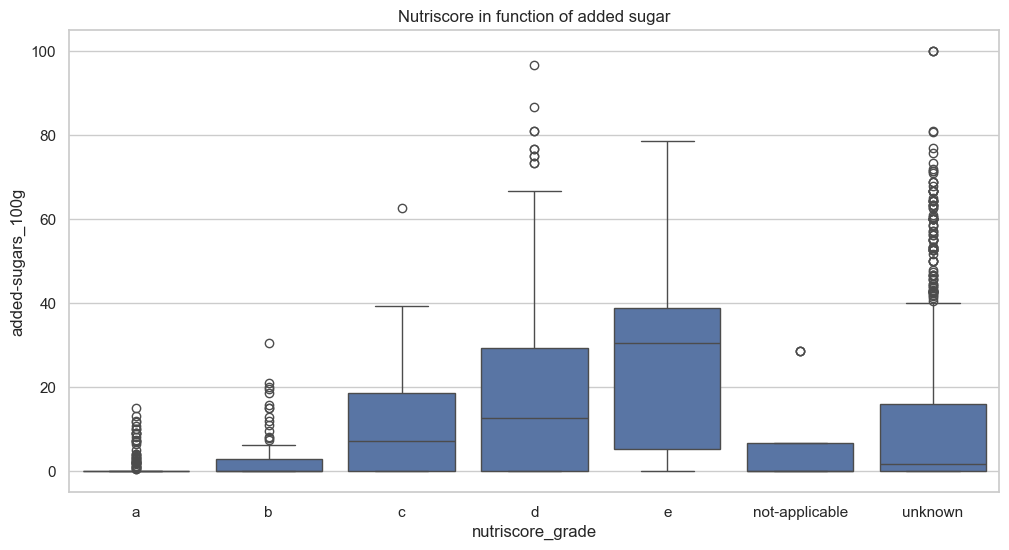

In [36]:
# Plot the nutriscore in function of added sugar
import matplotlib.pyplot as plt
import seaborn as sns

sorted_nutriscore_grades = sorted(opf_data_sugg_add['nutriscore_grade'].unique())


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='nutriscore_grade', y='added-sugars_100g', data=opf_data_sugg_add, order=sorted_nutriscore_grades)
plt.title('Nutriscore in function of added sugar')
plt.show()

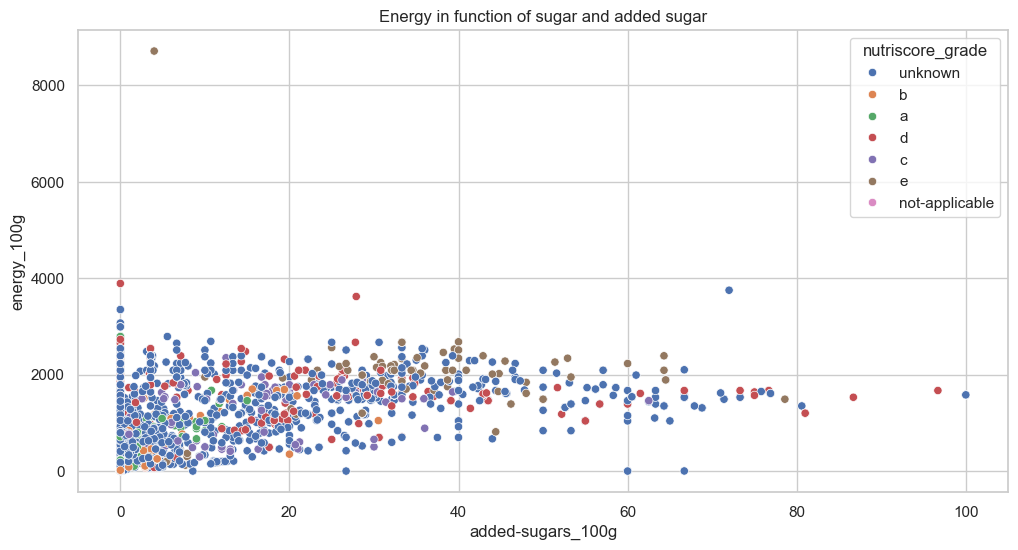

In [37]:
# Plot the energy by 100g in fct of sugar and added suggar
plt.figure(figsize=(12, 6))
sns.scatterplot(x='added-sugars_100g', y='energy_100g', hue='nutriscore_grade', data=opf_data_sugg_add)
plt.title('Energy in function of sugar and added sugar')
plt.show()

In [38]:
# Build a regression model to predict the added sugar value given all the other nutrients in the product marked by _100g
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Filter the data where added sugar is not missing
opf_data_sugg_add = opf_data[opf_data['added-sugars_100g'].notna()]

# Filter the columns that have _100g in them
opf_num_features = opf_data_sugg_add.filter(regex='_100g')

# Remove the added sugar column
opf_num_features.drop(columns='added-sugars_100g', inplace=True)

# replace Nan with zeros
opf_num_features.fillna(0, inplace=True)

# Filter the added sugar column
added_sugar = opf_data_sugg_add['added-sugars_100g']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(opf_num_features, added_sugar, test_size=0.2, random_state=11)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=11),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

# Train the models and predict the values
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_12022/1606196876.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_num_features.drop(columns='added-sugars_100g', inplace=True)
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_12022/1606196876.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_num_features.fillna(0, inplace=True)


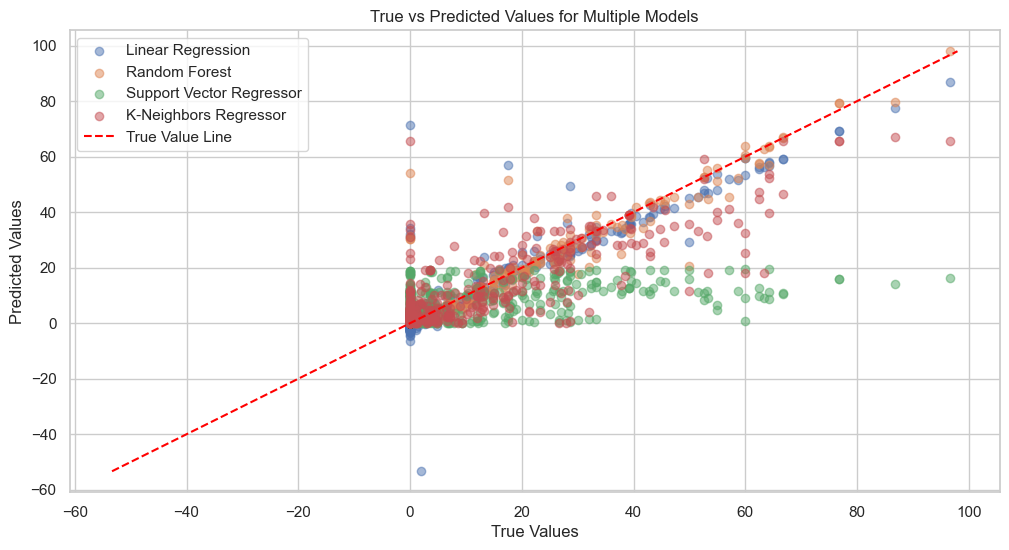

In [39]:
# Plot the predicted values against the true values
plt.figure(figsize=(12, 6))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)

# Add the true value line
min_val = min(y_test.min(), min([y_pred.min() for y_pred in predictions.values()]))
max_val = max(y_test.max(), max([y_pred.max() for y_pred in predictions.values()]))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='True Value Line')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Multiple Models')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize a dictionary to store the evaluation metrics
metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'R²': []
}

# Calculate the evaluation metrics for each model
for name, y_pred in predictions.items():
    metrics['Model'].append(name)
    metrics['MAE'].append(mean_absolute_error(y_test, y_pred))
    metrics['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics['R²'].append(r2_score(y_test, y_pred))

# Convert the metrics dictionary to a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the metrics
print(metrics_df)

# Determine the best model based on the lowest MSE
best_model = metrics_df.loc[metrics_df['MSE'].idxmin()]

print(f"Best model based on MSE: {best_model['Model']}")

                      Model       MAE         MSE        R²
0         Linear Regression  2.895571   39.345487  0.866543
1             Random Forest  1.986736   24.345114  0.917423
2  Support Vector Regressor  9.633966  252.188556  0.144598
3     K-Neighbors Regressor  5.505695   91.302231  0.690311
Best model based on MSE: Random Forest


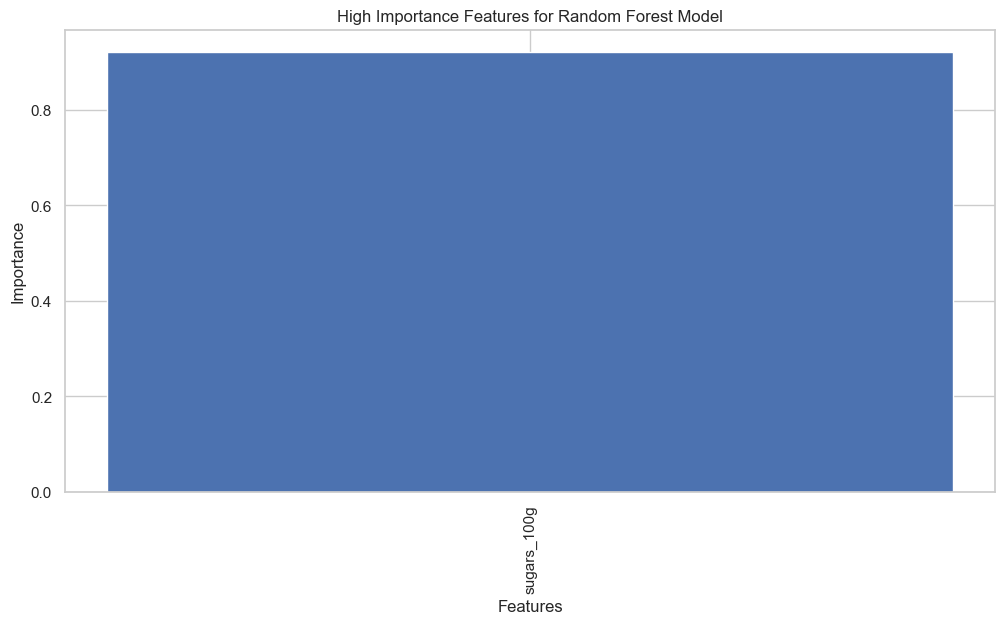

In [41]:
# Plot the feature importances for the Random Forest model
import numpy as np
# Set a threshold for feature importance
threshold = 0.02

# Get the feature importances from the Random Forest model
importances = models['Random Forest'].feature_importances_

# Filter the features based on the threshold
high_importance_indices = np.where(importances > threshold)[0]
high_importance_features = X_train.columns[high_importance_indices]
high_importance_values = importances[high_importance_indices]

# Sort the features by importance
sorted_indices = np.argsort(high_importance_values)[::-1]
high_importance_features = high_importance_features[sorted_indices]
high_importance_values = high_importance_values[sorted_indices]

# Plot the high importance features
plt.figure(figsize=(12, 6))
plt.bar(high_importance_features, high_importance_values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('High Importance Features for Random Forest Model')
plt.xticks(rotation=90)
plt.show()

In [42]:
# Predict the added sugar value for rest of the data, using the best model
# Filter the data where added sugar is missing
opf_data_sugg_add_missing = opf_data[opf_data['added-sugars_100g'].isna()]

# Filter the columns that have _100g in them
opf_num_features_missing = opf_data_sugg_add_missing.filter(regex='_100g')

# Remove the added sugar column
opf_num_features_missing.drop(columns='added-sugars_100g', inplace=True)

# replace Nan with zeros
opf_num_features_missing.fillna(0, inplace=True)

# Predict the added sugar values using the best model
added_sugar_missing = models['Random Forest'].predict(opf_num_features_missing)

# Add the predicted values to the original DataFrame
opf_data_sugg_add_missing['added-sugars_100g'] = added_sugar_missing

# Display the updated DataFrame
opf_data_sugg_add_missing

/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_12022/2191147295.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_num_features_missing.drop(columns='added-sugars_100g', inplace=True)
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_12022/2191147295.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_num_features_missing.fillna(0, inplace=True)
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_12022/2191147295.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1692101569,2023-08-15T12:12:49Z,digg,1.707748e+09,2024-02-12T14:25:39Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,1.707864e+09,2024-02-13T22:43:38Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1682646029,2023-04-28T01:40:29Z,isabel626,1.707844e+09,2024-02-13T17:00:47Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,1.707742e+09,2024-02-12T12:49:37Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,1.707490e+09,2024-02-09T14:47:36Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,31000223243,http://world-en.openfoodfacts.org/product/0031...,org-database-usda,1587583472,2020-04-22T19:24:32Z,1587583473,2020-04-22T19:24:33Z,org-database-usda,1.707651e+09,2024-02-11T11:24:22Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,31000267117,http://world-en.openfoodfacts.org/product/0031...,kiliweb,1644243926,2022-02-07T14:25:26Z,1659682540,2022-08-05T06:55:40Z,teolemon,1.707854e+09,2024-02-13T19:57:37Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,31000303969,http://world-en.openfoodfacts.org/product/0031...,kiliweb,1626110325,2021-07-12T17:18:45Z,1693259802,2023-08-28T21:56:42Z,roboto-app,1.707840e+09,2024-02-13T15:57:29Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,31000304744,http://world-en.openfoodfacts.org/product/0031...,openfoodfacts-contributors,1586916187,2020-04-15T02:03:07Z,1676169841,2023-02-12T02:44:01Z,wolfgang8741,1.707650e+09,2024-02-11T11:06:18Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Get the top 10 products with the highest predicted added sugar values
top_10_products = opf_data_sugg_add_missing.nlargest(10, 'added-sugars_100g')
top_10_products[['product_name', 'added-sugars_100g']]

,product_name,added-sugars_100g
48797,Fairtrade golden granulated cane sugar,98.613
50131,White Sugar,98.613
50139,White granulated sugar,98.613
50143,White caster sugar,98.613
50145,Icing Sugar,98.363
50146,Icing Sugar,98.359
86265,Nesquik,98.359
50121,Fairtrade white caster sugar,98.274
99392,Bâton en sucre à l'arôme de menthe,98.274
12126,Sweetened Tea,97.975


In [44]:
# Get the top 10 products with the lowest predicted added sugar values
bottom_10_products = opf_data_sugg_add_missing.nsmallest(10, 'added-sugars_100g')
bottom_10_products[['product_name', 'added-sugars_100g']]

,product_name,added-sugars_100g
0,jeunes pousses,0.0
5,Cacao,0.0
6,Filetes de pollo empanado,0.0
7,Burger Meat Pollo,0.0
9,Blueberry Cobbler Coffee,0.0
10,hyde icon,0.0
14,Pistou d'ail des ours,0.0
16,Pain maïs,0.0
17,Mendiants,0.0
18,Limonade artisanale a la rose,0.0
